# 1. Introduction to Sampling
#### Data Mining Summer 2020, UVic
### numpy.random()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Sampling from a Unifrom distirbution [0,1)

In [2]:
np.random.sample()

0.2741485701479883

Uniform sampling between [l,h) interval

In [3]:
l = 3
h = 7
(h-l) * np.random.sample() + l

3.2944127134224286

Sampling multiple points

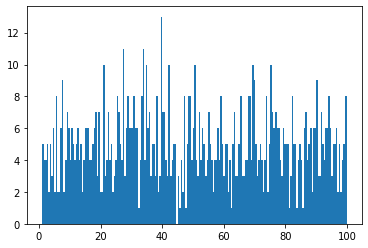

In [4]:
n = 1000
l = 1
h = 100
samples = (h-l) * np.random.sample(n) + l
plt.hist(samples,bins = 200)
plt.show()

Alternatively, you can call np.random.rand() function

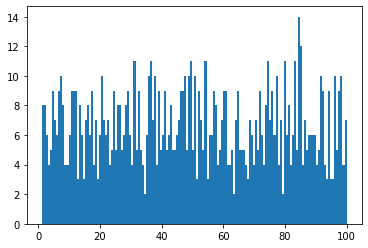

In [5]:
h =100
l = 1
samples = (h-l) * np.random.rand(1000) + l
plt.hist(samples,bins=150)
plt.show()

### Sampling from well-known distributions
#### Normal Distrubtion: numpy.random.normal(loc=0.0, scale=1.0, size=None)

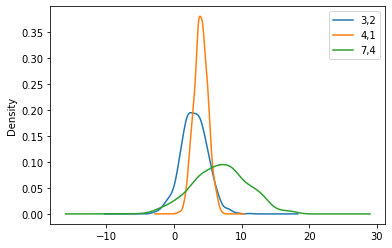

In [6]:
import pandas as pd
n = 1000
samples = np.random.randn(n,1)
samples1 = np.random.normal(3,2,1000)
samples2 = np.random.normal(4,1,1000)
samples3 = np.random.normal(7,4,1000)
df = pd.DataFrame({'3,2':samples1 , '4,1':samples2 , '7,4':samples3})
df.plot.density()

### Sampling Beta Distribution
### np.random.beta(a, b, size=None)
$$f(x;\alpha,\beta) = \frac{1}{B(\alpha,\beta)}x^{\alpha - 1}(1-x) ^{\beta -1}$$
Where the normalization $B$ is the Beta function:
$$B(\alpha, \beta) = \int_{0}^{1} t^{\alpha-1}(1-t)^{\beta - 1}dt$$.


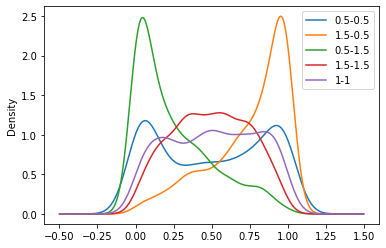

In [7]:
betaSamples1 = np.random.beta(0.5,0.5,1000)
betaSamples2 = np.random.beta(1.5,0.5,1000)
betaSamples3 = np.random.beta(0.5,1.5,1000)
betaSamples4 = np.random.beta(1.5,1.5,1000)
betaSamples5 = np.random.beta(1,1,1000)

dfBeta = pd.DataFrame({'0.5-0.5':betaSamples1, '1.5-0.5':betaSamples2 
                       , '0.5-1.5': betaSamples3 , '1.5-1.5': betaSamples4, '1-1': betaSamples5 })
dfBeta.plot.density()

## Sampling Binomial Distribution
### numpy.random.binomial(n, p, size=None)
$$P(N) = {n \choose N} p^N (1-p)^{n-N}$$

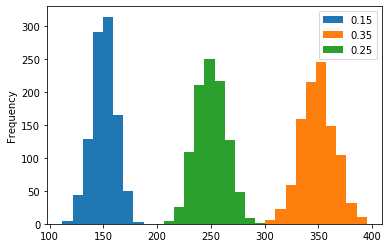

In [8]:
n = 1000
binomSample1 = np.random.binomial(n,0.15,1000)
binomSample2 = np.random.binomial(n,0.35,1000)
binomSample3 = np.random.binomial(n,0.25,1000)
dfBinom = pd.DataFrame({'0.15': binomSample1 , '0.35': binomSample2 ,'0.25':binomSample3})
# dfBinom.plot.density()
dfBinom.plot.hist(bins = 30)

## Others
### Dirichlet, chisquare, exponential, gamma, gemetric, ... by using numpy.random.chisquare  etc

## Sampling from Discrete Collections
### numpy.random.randint(low, high=None, size=None)

In [9]:
low = 3
hight = 11
samples = np.random.randint(low,hight,(10,2))
print(samples.shape)

(10, 2)


We can also sample from a discrete set by using <b>numpy.random.choice()</b>

In [10]:
# Generate a list of integers from 1 to 99:
iList = np.arange(1,100,1)   # start, stop, step
k = 20
np.random.choice(iList, size=k,replace=False) 

array([26,  5, 36, 12, 79, 91, 82, 27, 92, 16,  6, 69, 89, 53, 38, 30, 96,
       21, 35, 23])

### Sampling over non-unifrom distribution

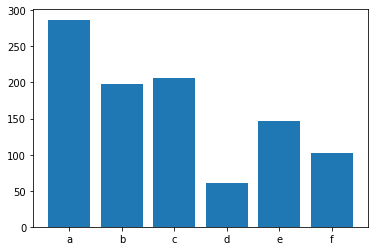

In [11]:
p = [0.3, 0.2, 0.2, 0.05, 0.15, 0.1]   # prob must sum to 1.
k = 1000
cList = ['a', 'b', 'c', 'd', 'e', 'f']
cSamp = np.random.choice(cList, size=k, p=p) 
label, counts = np.unique(cSamp, return_counts=True)
plt.bar(label, counts)
plt.show()

### Random Variables
Let us use a dice game for illustration.
Roll two dice, take the sum. 

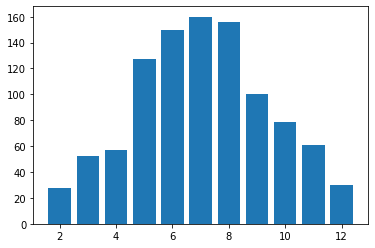

In [12]:
dice = [1,2,3,4,5,6]
k = 1000
roll1 = np.random.choice(dice, size=k)
roll2 = np.random.choice(dice, size=k)
sumD = roll1 + roll2
label, counts = np.unique(sumD, return_counts=True)
plt.bar(label, counts)
plt.show()

### Question: 
1. Roll two dice, take the sum again. Assume that the dice are not fair. Say with $p=[0.30, 0.20, 0.16, 0.12, 0.11, 0.11]$.

### Answer:

### Question:
2. Roll two fair dice. Take the larger value as output.Do k times. Plot the distribution.

### Answer:

### Question:
3. Flip 8 coins. Take number of Heads as output. Plot the distribution. 

## Data Sampling

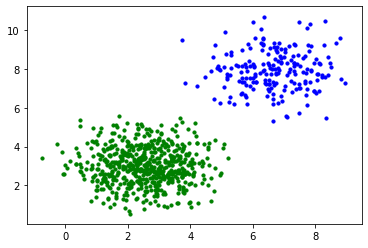

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
numSamples = [600,200]
samples,labels = make_blobs(n_samples=numSamples, 
                             centers=([2.5, 3], [6.7, 7.9]))

colours = ('green', 'blue')

fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=10)

(40, 2)
(40,)


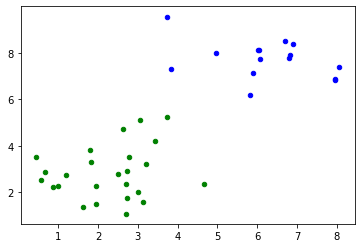

In [14]:
idx = np.arange(len(samples))
s = np.random.choice(idx, size=int(len(samples)/20), replace=False)
sampledPts = samples[s]
sampledLables = np.array(labels[s])
print(sampledPts.shape)
print(sampledLables.shape)
colours = ('green', 'blue')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(sampledPts[sampledLables==n_class][:, 0], sampledPts[sampledLables==n_class][:, 1]
               ,c=colours[n_class],s=20)

# Second Part - Handling imbalanced data
* It happens when the observation of one class is much higher or lower than other class
    * Anomally Detection, Fraud Detection, etc
    * https://www.kaggle.com/qianchao/smote-with-imbalance-data
* Standard ML techniques have a bias towards the **majority** class, and they tend to ignore the minority class.

## SMOTH ( (Synthetic Minority Oversampling Technique) – Oversampling Algorithm
#### Steps
*  Setting the minority class set A, for each $x \in A$, the k-nearest neighbors of $x$ are obtained by calculating the Euclidean distance between $x$ and every other sample in set $A$.
* The sampling rate N is set according to the imbalanced proportion. For each $x \in A$, N examples (i.e x1, x2, …xn) are randomly selected from its k-nearest neighbors, and they construct the set $A_1$.
* For each example $x_k \in A_1$ (k=1, 2, 3…N), the following formula is used to generate a new example:
$$x' = x + rand(0, 1) \times \mid x - x_k \mid$$
in which rand(0, 1) represents the random number between 0 and 1.

https://arxiv.org/pdf/1106.1813.pdf

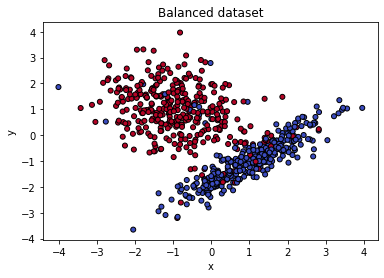

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
seed = 100

# create balanced dataset
X1, Y1 = make_classification(n_samples=700, n_features=2, n_redundant=0,
                            n_informative=2, n_clusters_per_class=1,
                            class_sep=1.0, flip_y=0.06, random_state=seed)

plt.title('Balanced dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()
# concatenate the features and labels into one dataframe
df = pd.concat([pd.DataFrame(X1), pd.DataFrame(Y1)], axis=1)
df.columns = ['feature_1', 'feature_2', 'label']
# save the dataset because we'll use it later
df.to_csv('df_base.csv', index=False, encoding='utf-8')

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 



def train_SVM(df):
    # select the feature columns
    X = df.loc[:, df.columns != 'label']
    # select the label column
    y = df.label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 


    # train an SVM with linear kernel
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    return clf,X_test,y_test


def plot_svm_boundary(clf, df, title):
   fig, ax = plt.subplots()
   X0, X1 = df.iloc[:, 0], df.iloc[:, 1]

   x_min, x_max = X0.min() - 1, X0.max() + 1
   y_min, y_max = X1.min() - 1, X1.max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)
   out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

   ax.scatter(X0, X1, c=df.label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
   ax.set_ylabel('y')
   ax.set_xlabel('x')
   ax.set_title(title)
   plt.show()


[[97 11]
 [ 5 97]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       108
           1       0.90      0.95      0.92       102

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.93      0.92      0.92       210



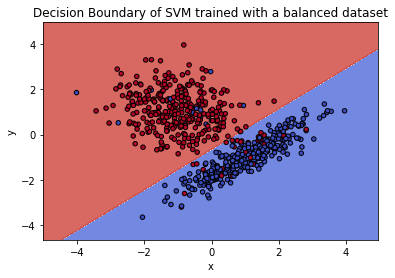

In [17]:
df = pd.read_csv('df_base.csv', encoding='utf-8', engine='python')
clf,X_test,y_test = train_SVM(df)
Predictoin = clf.predict(X_test)
print(confusion_matrix(Predictoin,y_test))
print(classification_report(Predictoin,y_test))
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with a balanced dataset')

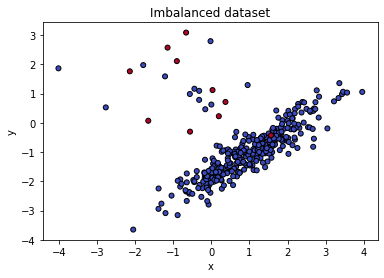

In [18]:
from imblearn.datasets import make_imbalance
X_res , y_res = make_imbalance(X1, Y1, sampling_strategy={0: 340, 1: 10}, random_state=seed)
plt.title('Imbalanced dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()


df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df.columns = ['feature_1', 'feature_2', 'label']
df.to_csv('df_imbalanced.csv', index=False, encoding='utf-8')

[[102   3]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.00      0.00      0.00         0

    accuracy                           0.97       105
   macro avg       0.50      0.49      0.49       105
weighted avg       1.00      0.97      0.99       105



/Users/mahdiH/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


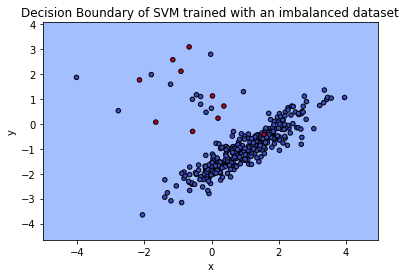

In [19]:
df = pd.read_csv('df_imbalanced.csv', encoding='utf-8', engine='python')
clf,X_test,y_test = train_SVM(df)
Predictoin = clf.predict(X_test)
print(confusion_matrix(Predictoin,y_test))
print(classification_report(Predictoin,y_test))
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with an imbalanced dataset')

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'tuple'>


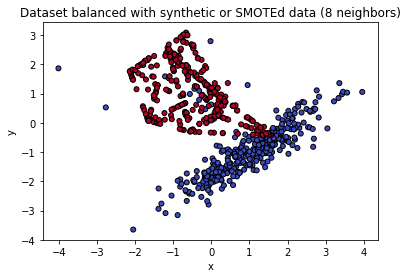

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 8

df = pd.read_csv('df_imbalanced.csv', encoding='utf-8', engine='python')
X = df.loc[:, df.columns != 'label']
y = df.label
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)
print(type(X_res))
X_res1 = X_res.values
print(type(X_res1))
y_res1 = np.asarray(y_res)
print(type(y_res.shape))
plt.title('Dataset balanced with synthetic or SMOTEd data ({} neighbors)'.format(k))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res1[:, 0], X_res1[:, 1], marker='o', c=y_res1,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df.columns = ['feature_1', 'feature_2', 'label']
df.to_csv('df_smoted.csv', index=False, encoding='utf-8')

[[99  0]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        99
           1       1.00      0.50      0.67         6

    accuracy                           0.97       105
   macro avg       0.99      0.75      0.83       105
weighted avg       0.97      0.97      0.97       105



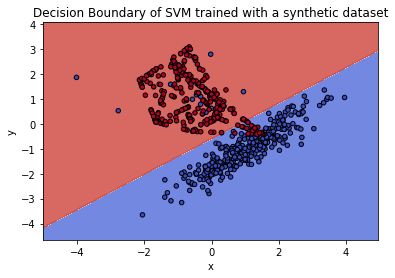

In [21]:
df = pd.read_csv('df_smoted.csv', encoding='utf-8', engine='python')
clf,X_test_temp,y_test_temp = train_SVM(df)
Predictoin = clf.predict(X_test)
print(confusion_matrix(Predictoin,y_test))
print(classification_report(Predictoin,y_test))
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with a synthetic dataset')

## Under Sampling Technique 
* It remove samples from the majority class which are closer to the minority class samples